In [744]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [745]:
train_data=pd.read_csv("train.csv")

In [746]:
train_data.isna().values.any()

True

In [747]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [748]:
train_data.fillna("S",inplace=True)

In [749]:
print(train_data["Embarked"].nunique())

3


In [750]:
train_data.Parch.nunique()

7

In [751]:
train_data.isna().values.any()

False

In [752]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

In [753]:
train_data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

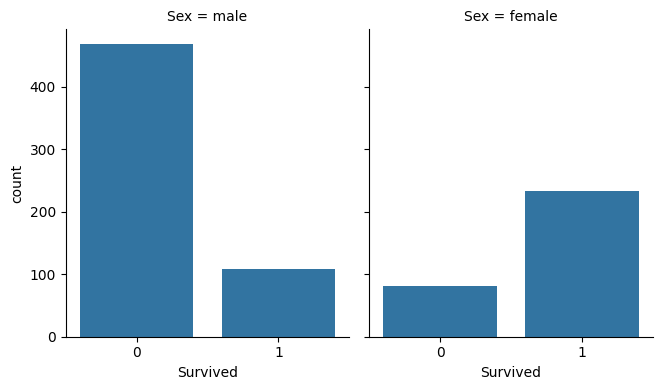

In [754]:
sns.catplot(x="Survived", col="Sex", col_wrap=4,
                data=train_data,
                kind="count", height=4, aspect=.8)

In [755]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [756]:
train_data.shape

(891, 12)

In [757]:
duplicated=train_data["Ticket"].duplicated()
print(duplicated.shape)
print(len([i for i in duplicated if i==True]))


(891,)
210


In [758]:
print(feature)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [759]:
train_data["Family_size"]=train_data["SibSp"]+train_data["Parch"]+1

In [760]:
train_data.Family_size.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [761]:
train_data.Sex = train_data.Sex.map({"male":0, "female":1})
train_data.Age.unique()

array([22.0, 38.0, 26.0, 35.0, 'S', 54.0, 2.0, 27.0, 14.0, 4.0, 58.0,
       20.0, 39.0, 55.0, 31.0, 34.0, 15.0, 28.0, 8.0, 19.0, 40.0, 66.0,
       42.0, 21.0, 18.0, 3.0, 7.0, 49.0, 29.0, 65.0, 28.5, 5.0, 11.0,
       45.0, 17.0, 32.0, 16.0, 25.0, 0.83, 30.0, 33.0, 23.0, 24.0, 46.0,
       59.0, 71.0, 37.0, 47.0, 14.5, 70.5, 32.5, 12.0, 9.0, 36.5, 51.0,
       55.5, 40.5, 44.0, 1.0, 61.0, 56.0, 50.0, 36.0, 45.5, 20.5, 62.0,
       41.0, 52.0, 63.0, 23.5, 0.92, 43.0, 60.0, 10.0, 64.0, 13.0, 48.0,
       0.75, 53.0, 57.0, 80.0, 70.0, 24.5, 6.0, 0.67, 30.5, 0.42, 34.5,
       74.0], dtype=object)

In [762]:
def process_age_type(row):
    age = row.Age
    
    if age=="S":
        return "senior"
    elif age <=5:
        return "infant"
    elif age <=18:
        return "adolescent"
    elif age <= 24:
        return "adult"
    elif age <= 44:
        return "middle_aged"
    elif age <= 64:
        return "old"
    else:
        return "senior"
train_data["Age_type"] = train_data.apply(process_age_type, axis=1)

In [763]:
def process_fare_type(row):
    age = row.Fare
    
    
    if age=="S":
        return "five_star"
    elif age >= 200:
        
        return "five_star"
    elif age >= 150:
        return "four_star"
    elif age >=100:
        return "three_star"
    elif age >=50:
        return "two_star"
    else:
        return "one_star"
train_data["Fare_type"] = train_data.apply(process_fare_type, axis=1)

In [764]:
def process_deck(row):
    cabin = row.Cabin
    if pd.isnull(cabin):
        return "U"
    else:
        return cabin[0]
train_data["Deck"] = train_data.apply(process_deck, axis=1)


In [765]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Age_type,Fare_type,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,S,2,adult,one_star,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,middle_aged,two_star,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,S,1,middle_aged,one_star,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,middle_aged,two_star,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,S,1,middle_aged,one_star,S


In [766]:
train_data.Deck.unique()

array(['S', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

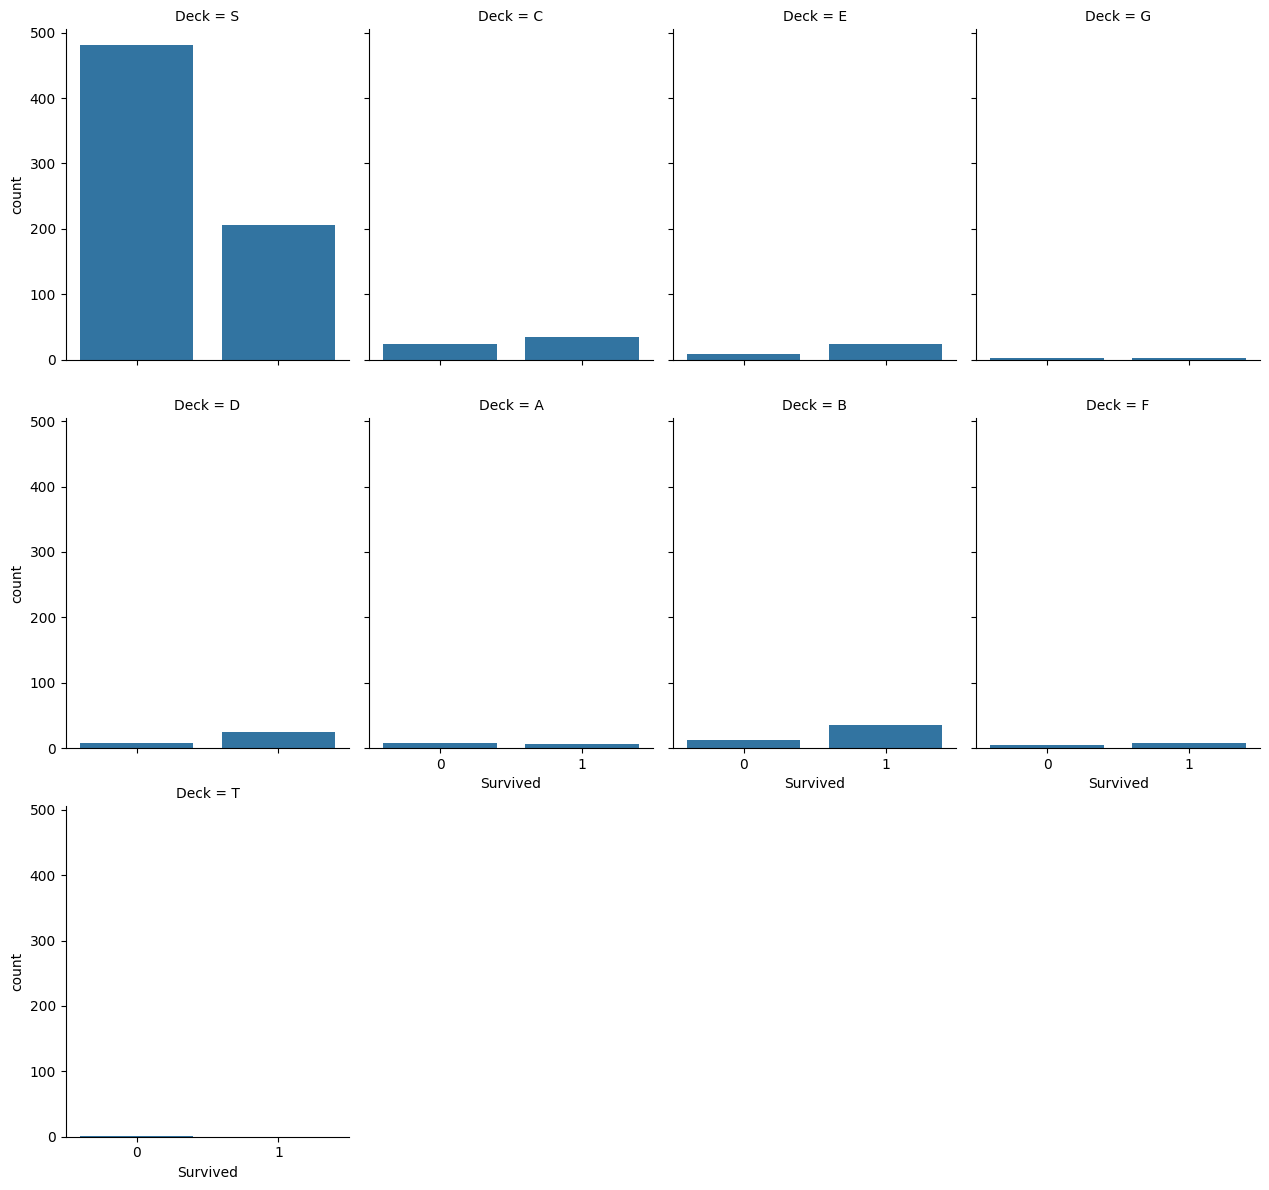

In [767]:
sns.catplot(x="Survived", col="Deck", col_wrap=4,
                data=train_data,
                kind="count", height=4, aspect=.8)

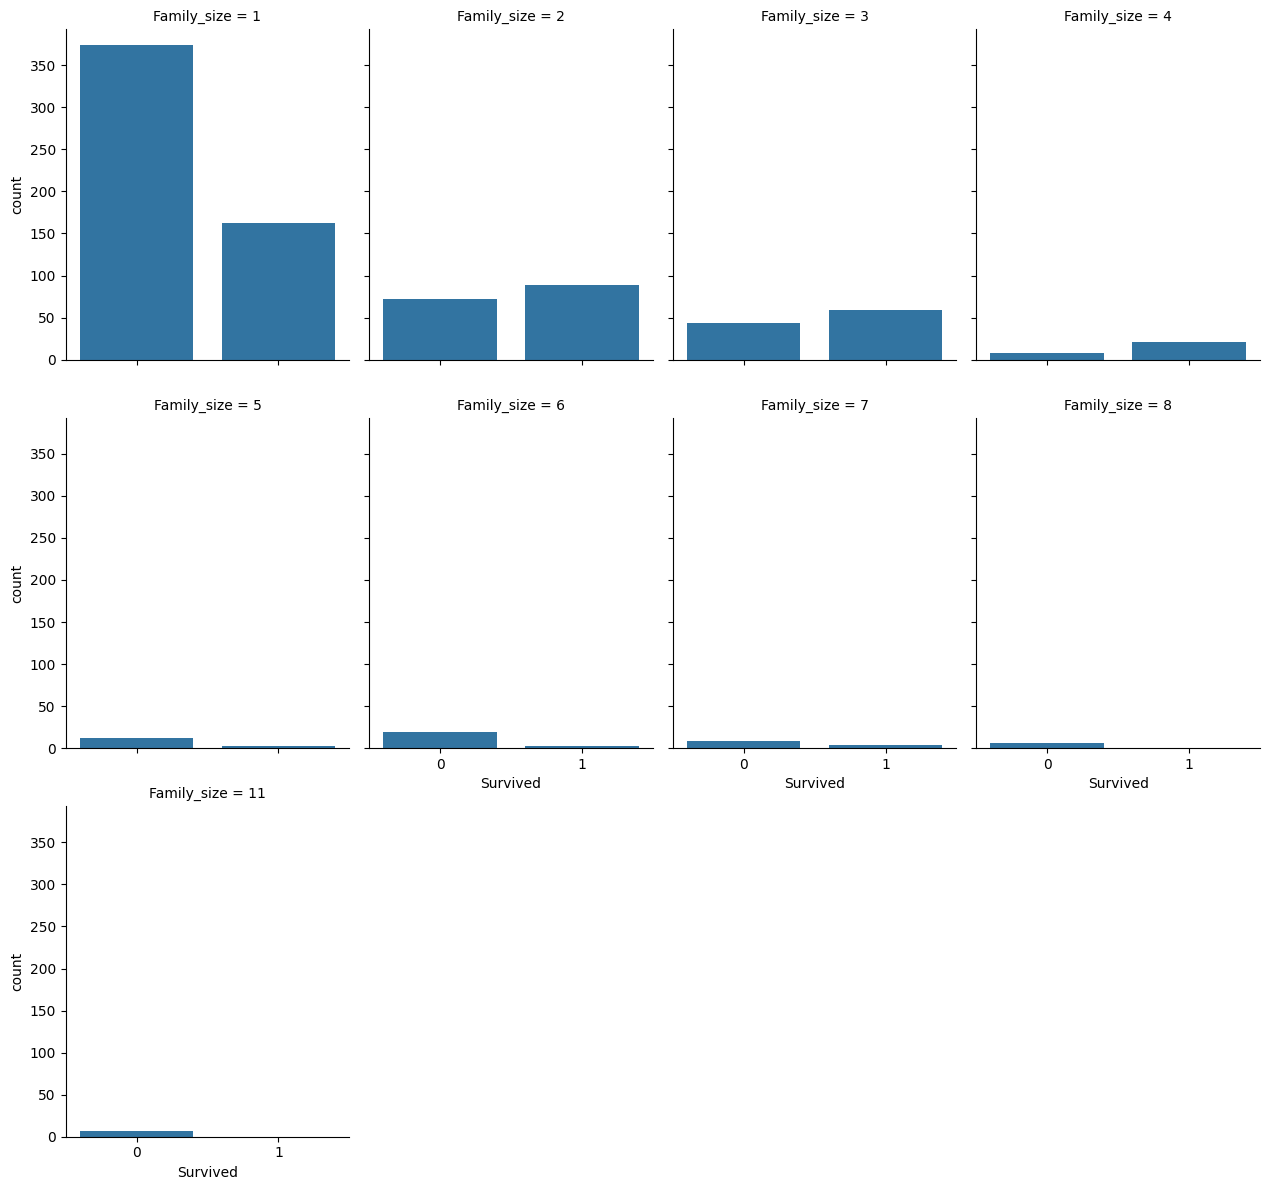

In [768]:
sns.catplot(x="Survived", col="Family_size", col_wrap=4,
                data=train_data,
                kind="count", height=4, aspect=.8)

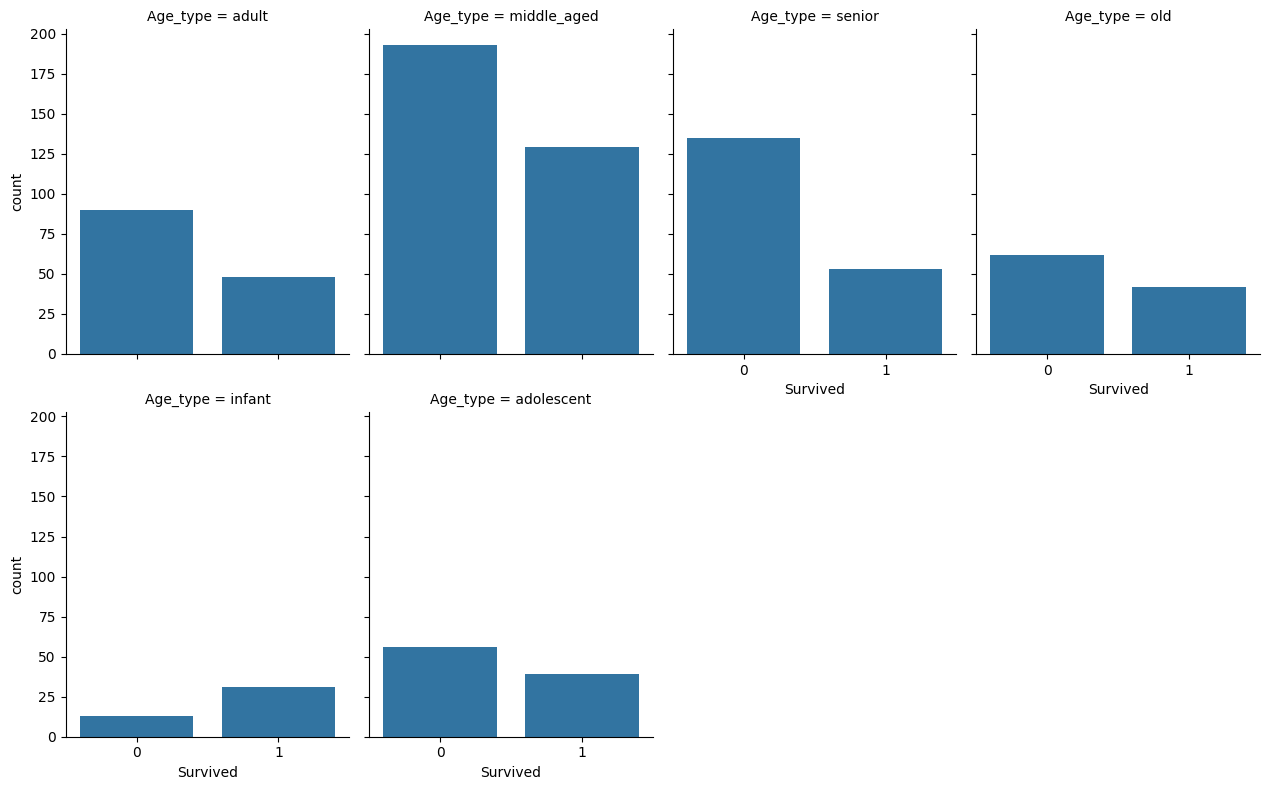

In [769]:
sns.catplot(x="Survived", col="Age_type", col_wrap=4,
                data=train_data,
                kind="count", height=4, aspect=.8)

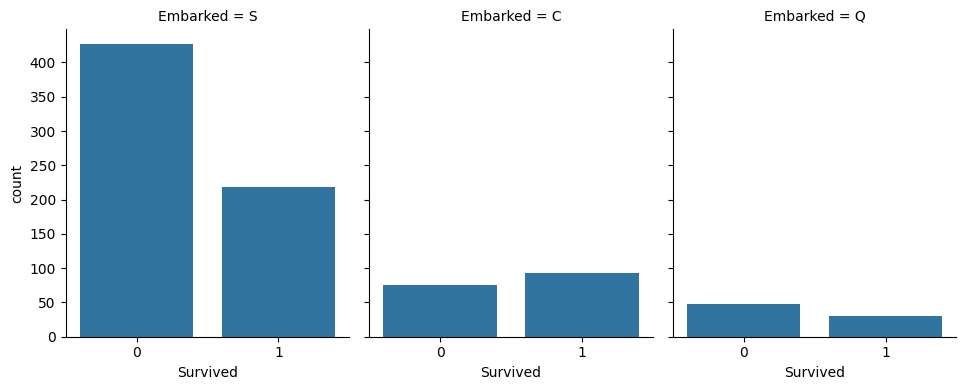

In [770]:
sns.catplot(x="Survived", col="Embarked", col_wrap=4,
                data=train_data,
                kind="count", height=4, aspect=.8)

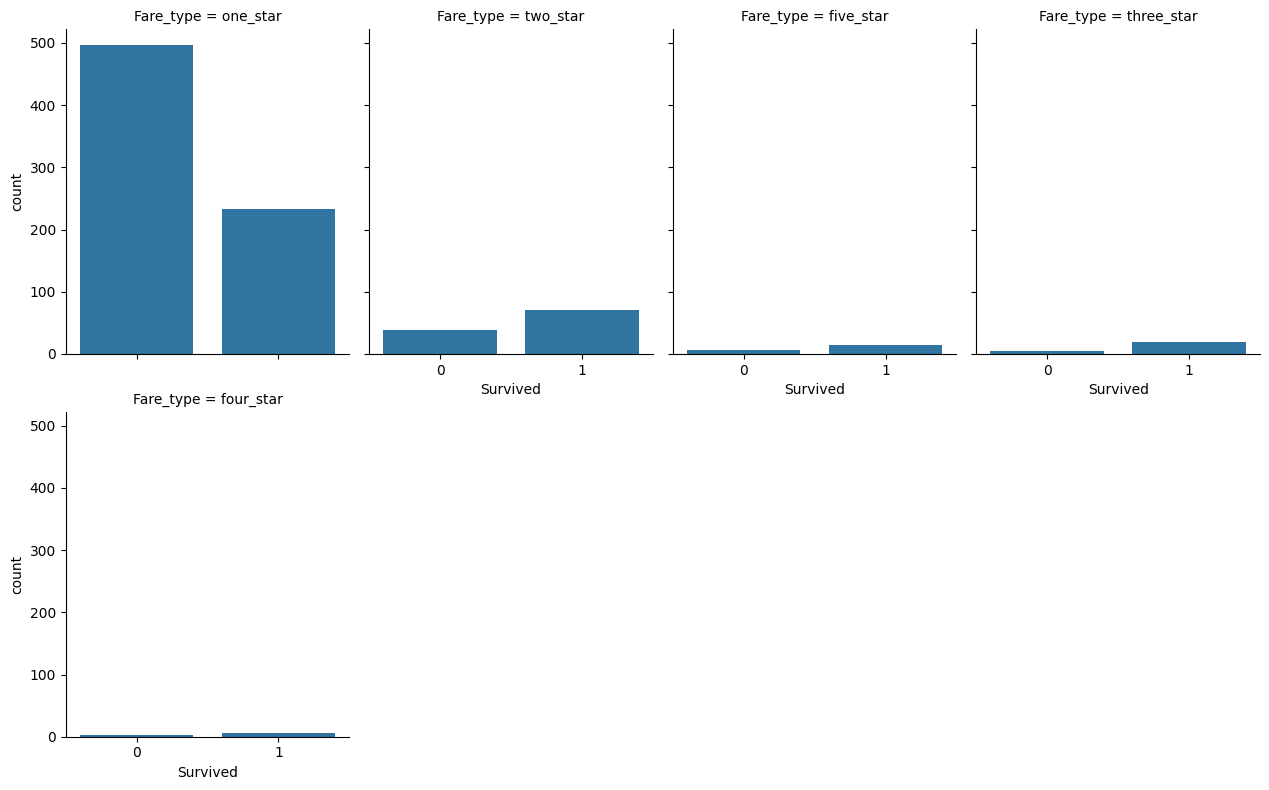

In [771]:
sns.catplot(x="Survived", col="Fare_type", col_wrap=4,
                data=train_data,
                kind="count", height=4, aspect=.8)

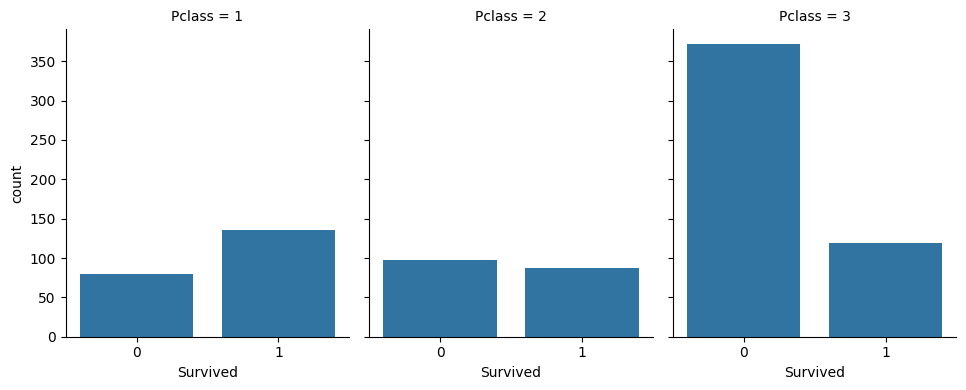

In [772]:
sns.catplot(x="Survived", col="Pclass", col_wrap=4,
                data=train_data,
                kind="count", height=4, aspect=.8)

In [773]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Age_type,Fare_type,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,S,2,adult,one_star,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,middle_aged,two_star,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,S,1,middle_aged,one_star,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,middle_aged,two_star,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,S,1,middle_aged,one_star,S


In [774]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
Family_size      9
Age_type         6
Fare_type        5
Deck             9
dtype: int64

In [775]:
feature_dummy=["Pclass","Embarked","Family_size","Age_type","Deck","Fare_type"]
print(feature_dummy)

['Pclass', 'Embarked', 'Family_size', 'Age_type', 'Deck', 'Fare_type']


In [776]:
df=pd.get_dummies(data=train_data,prefix=feature_dummy,columns=feature_dummy)

In [777]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family_size_1',
       'Family_size_2', 'Family_size_3', 'Family_size_4', 'Family_size_5',
       'Family_size_6', 'Family_size_7', 'Family_size_8', 'Family_size_11',
       'Age_type_adolescent', 'Age_type_adult', 'Age_type_infant',
       'Age_type_middle_aged', 'Age_type_old', 'Age_type_senior', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_S',
       'Deck_T', 'Fare_type_five_star', 'Fare_type_four_star',
       'Fare_type_one_star', 'Fare_type_three_star', 'Fare_type_two_star'],
      dtype='object')

In [778]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck_E,Deck_F,Deck_G,Deck_S,Deck_T,Fare_type_five_star,Fare_type_four_star,Fare_type_one_star,Fare_type_three_star,Fare_type_two_star
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,...,False,False,False,True,False,False,False,True,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,...,False,False,False,False,False,False,False,False,False,True
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,...,False,False,False,True,False,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,...,False,False,False,False,False,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,...,False,False,False,True,False,False,False,True,False,False


In [779]:

feature_to_delete=["PassengerId","Survived","Name","Age","SibSp","Parch","Ticket","Fare","Cabin"]

In [780]:
new_feature=[i for i in df.columns if i not in  feature_to_delete]

In [781]:
print(new_feature)

['Sex', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family_size_1', 'Family_size_2', 'Family_size_3', 'Family_size_4', 'Family_size_5', 'Family_size_6', 'Family_size_7', 'Family_size_8', 'Family_size_11', 'Age_type_adolescent', 'Age_type_adult', 'Age_type_infant', 'Age_type_middle_aged', 'Age_type_old', 'Age_type_senior', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_S', 'Deck_T', 'Fare_type_five_star', 'Fare_type_four_star', 'Fare_type_one_star', 'Fare_type_three_star', 'Fare_type_two_star']


In [782]:
X_train,y_train=df[new_feature],df["Survived"]

In [783]:
print(X_train.shape)

(891, 36)


In [784]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=1)

In [785]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_val,y_val=np.array(X_val),np.array(y_val)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(712, 36) (712,)
(179, 36) (179,)


In [786]:
X_train[0]
y=y_train.reshape(-1,1)
print(y.shape)
print(X_train[0])

(712, 1)
[0 False False True False True False False False True False False False
 False False False False False False False False True False False False
 False False False False True False False False True False False]


In [787]:
model2 = XGBClassifier(learning_rate=0.01,
                     n_estimators=1150,
                     max_depth=5,
                     objective= 'binary:logistic',
                    verbosity = 1, random_state = 50,
                    early_stopping_rounds=10
                    
                    )

In [788]:
model2.fit(X_train,y_train,eval_set=[(X_val,y_val)])

[0]	validation_0-logloss:0.67363
[1]	validation_0-logloss:0.66968
[2]	validation_0-logloss:0.66578
[3]	validation_0-logloss:0.66200
[4]	validation_0-logloss:0.65831
[5]	validation_0-logloss:0.65469
[6]	validation_0-logloss:0.65111
[7]	validation_0-logloss:0.64764
[8]	validation_0-logloss:0.64425
[9]	validation_0-logloss:0.64092
[10]	validation_0-logloss:0.63763
[11]	validation_0-logloss:0.63443
[12]	validation_0-logloss:0.63131
[13]	validation_0-logloss:0.62824
[14]	validation_0-logloss:0.62520
[15]	validation_0-logloss:0.62226
[16]	validation_0-logloss:0.61937
[17]	validation_0-logloss:0.61659
[18]	validation_0-logloss:0.61382
[19]	validation_0-logloss:0.61115
[20]	validation_0-logloss:0.60848
[21]	validation_0-logloss:0.60592
[22]	validation_0-logloss:0.60335
[23]	validation_0-logloss:0.60088
[24]	validation_0-logloss:0.59841
[25]	validation_0-logloss:0.59598
[26]	validation_0-logloss:0.59363
[27]	validation_0-logloss:0.59134
[28]	validation_0-logloss:0.58903
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1150, n_jobs=None,
              num_parallel_tree=None, random_state=50, ...)

In [789]:
model2.best_iteration

199

In [790]:
y_hat=model2.predict(X_val)

In [791]:
acca=accuracy_score(y_hat,y_val)

In [792]:
y_hat_train=model2.predict(X_train)

In [793]:
acca_train=accuracy_score(y_hat_train,y_train)

In [794]:
print("Accuracy with traing data:",acca_train)

Accuracy with traing data: 0.8609550561797753


In [795]:
print("Accuracy with Validation data:",acca)

Accuracy with Validation data: 0.7877094972067039


In [796]:
confusion_matrix = metrics.confusion_matrix(y_val, y_hat)

In [797]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

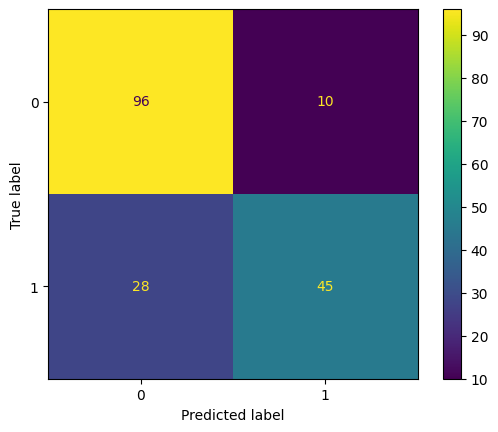

In [798]:
cm_display.plot()
plt.show()